In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [66]:
df =pd.read_csv('cleaned_df.csv')
df.head()

,Restaurant ID,Restaurant name,Distance,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",order_date,discount_percent,order_hour,Subzone_DLF Phase 1,Subzone_Greater Kailash 2 (GK2),Subzone_Sector 135,Subzone_Sector 4,Subzone_Shahdara,Subzone_Sikandarpur,Subzone_Vasant Kunj,is_weekend,is_holiday,hour_sin,hour_cos,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,meal_slot_late_night,meal_slot_lunch,orders_per_hour,orders_lag_1hr,orders_lag_24hr,rolling_mean_3hr,rolling_max_3hr
0,20320607,Swaad,3.0,80.0,0.0,2024-09-10,40.0,23,False,False,False,True,False,False,False,0,0,-0.258819,0.965926,False,False,False,False,True,False,True,False,9,5.0,1.0,7.666667,11.0
1,20320607,Swaad,2.0,175.0,0.0,2024-09-10,0.0,23,False,False,False,True,False,False,False,0,0,-0.258819,0.965926,False,False,False,False,True,False,True,False,9,5.0,1.0,7.666667,11.0
2,20320607,Swaad,0.9,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0
3,20320607,Swaad,2.0,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0
4,20320607,Swaad,2.0,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0


In [67]:
df.dtypes

Restaurant ID                                           int64
Restaurant name                                        object
Distance                                              float64
Restaurant discount (Promo)                           float64
Restaurant discount (Flat offs, Freebies & others)    float64
order_date                                             object
discount_percent                                      float64
order_hour                                              int64
Subzone_DLF Phase 1                                      bool
Subzone_Greater Kailash 2 (GK2)                          bool
Subzone_Sector 135                                       bool
Subzone_Sector 4                                         bool
Subzone_Shahdara                                         bool
Subzone_Sikandarpur                                      bool
Subzone_Vasant Kunj                                      bool
is_weekend                                              int64
is_holid

In [68]:
df.shape

(21131, 32)

In [69]:
pollution = pd.read_csv('../data/pollution.csv')

In [70]:
pollution.head()

,pollution_time_utc,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2024-09-01 00:00:00,4,907.90,0.12,26.73,16.99,22.65,55.62,69.80,5.64
1,2024-09-01 01:00:00,4,1108.17,1.98,33.59,6.97,28.37,64.29,82.57,7.79
2,2024-09-01 02:00:00,5,1575.47,15.20,35.99,4.96,38.15,83.51,111.33,12.67
3,2024-09-01 03:00:00,5,1922.61,28.16,38.39,13.95,46.73,97.97,132.27,16.72
4,2024-09-01 04:00:00,5,1615.52,14.31,47.98,37.55,57.70,95.38,122.27,16.97


In [71]:
pollution.shape

(3649, 10)

In [72]:
df['order_date'] = pd.to_datetime(df['order_date'], format="%Y-%m-%d")
df['order_date'] = df['order_date'].dt.date  # Extract date only

# --- Preprocess pollution data ---
pollution['pollution_time_utc'] = pd.to_datetime(pollution['pollution_time_utc'])
pollution['pollution_date'] = pollution['pollution_time_utc'].dt.date
pollution['pollution_hour'] = pollution['pollution_time_utc'].dt.hour

In [73]:
pollution_features = ['pollution_date', 'pollution_hour', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
pollution = pollution[pollution_features]

# --- Merge datasets on date and hour ---
merged_df = pd.merge(
    df,
    pollution,
    left_on=['order_date', 'order_hour'],
    right_on=['pollution_date', 'pollution_hour'],
    how='inner'
)

# Drop redundant columns
merged_df.drop(['pollution_date', 'pollution_hour'], axis=1, inplace=True)

merged_df.head()

,Restaurant ID,Restaurant name,Distance,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",order_date,discount_percent,order_hour,Subzone_DLF Phase 1,Subzone_Greater Kailash 2 (GK2),Subzone_Sector 135,Subzone_Sector 4,Subzone_Shahdara,Subzone_Sikandarpur,Subzone_Vasant Kunj,is_weekend,is_holiday,hour_sin,hour_cos,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,meal_slot_late_night,meal_slot_lunch,orders_per_hour,orders_lag_1hr,orders_lag_24hr,rolling_mean_3hr,rolling_max_3hr,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,20320607,Swaad,3.0,80.0,0.0,2024-09-10,40.0,23,False,False,False,True,False,False,False,0,0,-0.258819,0.965926,False,False,False,False,True,False,True,False,9,5.0,1.0,7.666667,11.0,5,6301.88,118.02,43.87,0.0,67.71,455.29,526.23,16.72
1,20320607,Swaad,2.0,175.0,0.0,2024-09-10,0.0,23,False,False,False,True,False,False,False,0,0,-0.258819,0.965926,False,False,False,False,True,False,True,False,9,5.0,1.0,7.666667,11.0,5,6301.88,118.02,43.87,0.0,67.71,455.29,526.23,16.72
2,20320607,Swaad,0.9,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0,5,6195.07,134.11,89.11,0.0,125.89,360.59,456.59,39.52
3,20320607,Swaad,2.0,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0,5,6195.07,134.11,89.11,0.0,125.89,360.59,456.59,39.52
4,20320607,Swaad,2.0,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0,5,6195.07,134.11,89.11,0.0,125.89,360.59,456.59,39.52


In [74]:
merged_df.shape

(21046, 41)

In [75]:
merged_df.dtypes

Restaurant ID                                           int64
Restaurant name                                        object
Distance                                              float64
Restaurant discount (Promo)                           float64
Restaurant discount (Flat offs, Freebies & others)    float64
order_date                                             object
discount_percent                                      float64
order_hour                                              int64
Subzone_DLF Phase 1                                      bool
Subzone_Greater Kailash 2 (GK2)                          bool
Subzone_Sector 135                                       bool
Subzone_Sector 4                                         bool
Subzone_Shahdara                                         bool
Subzone_Sikandarpur                                      bool
Subzone_Vasant Kunj                                      bool
is_weekend                                              int64
is_holid

In [76]:
# How many unique hours in orders vs pollution
print("Unique order hours:", df[['order_date','order_hour']].drop_duplicates().shape[0])
print("Unique pollution hours:", pollution[['pollution_date','pollution_hour']].drop_duplicates().shape[0])


Unique order hours: 2553
Unique pollution hours: 3649


In [77]:
restaurant_coords = {
    'Aura Pizzas': [28.55, 77.25], 'Swaad': [28.59, 77.36],
    'Dilli Burger Adda': [28.50, 77.20], 'Tandoori Junction': [28.53, 77.15],
    'The Chicken Junction': [28.52, 77.21], 'Masala Junction': [28.57, 77.35]
}

merged_df['rest_lat'] = merged_df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[0])
merged_df['rest_lon'] = merged_df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[1])

In [78]:
merged_df.columns

Index(['Restaurant ID', 'Restaurant name', 'Distance',
       'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'order_date',
       'discount_percent', 'order_hour', 'Subzone_DLF Phase 1',
       'Subzone_Greater Kailash 2 (GK2)', 'Subzone_Sector 135',
       'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
       'Subzone_Vasant Kunj', 'is_weekend', 'is_holiday', 'hour_sin',
       'hour_cos', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'meal_slot_late_night', 'meal_slot_lunch',
       'orders_per_hour', 'orders_lag_1hr', 'orders_lag_24hr',
       'rolling_mean_3hr', 'rolling_max_3hr', 'aqi', 'co', 'no', 'no2', 'o3',
       'so2', 'pm2_5', 'pm10', 'nh3', 'rest_lat', 'rest_lon'],
      dtype='object')

In [79]:
# -------------------------------
# Step 2: Prepare restaurant locations
# -------------------------------
required = ['Restaurant ID', 'rest_lat', 'rest_lon']
missing = [c for c in required if c not in merged_df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

rest_loc = merged_df[['Restaurant ID', 'rest_lat', 'rest_lon']].drop_duplicates()
print(f"Unique locations: {len(rest_loc)}")

Unique locations: 21


In [80]:
import pickle
# -------------------------------
# Step 3: Load weather cache
# -------------------------------
try:
    with open('weather_cache.pkl', 'rb') as f:
        weather_cache = pickle.load(f)
    print("Loaded weather_cache.pkl")
except FileNotFoundError:
    weather_cache = {}
    print("No cache found, starting fresh")

Loaded weather_cache.pkl


In [81]:
from tqdm import tqdm
from meteostat import Point, Hourly

# -------------------------------
# Step 4: Fetch weather for each location
# -------------------------------
weather_list = []

for _, row in tqdm(rest_loc.iterrows(), total=len(rest_loc), desc="Fetching Weather"):
    rid, lat, lon = row['Restaurant ID'], row['rest_lat'], row['rest_lon']
    key = (lat, lon)

    if key in weather_cache:
        wdf = weather_cache[key].copy()
    else:
        try:
            point = Point(lat, lon)
            # Define full date range from order dataset
            start = pd.to_datetime(merged_df['order_date'].min())
            end = pd.to_datetime(merged_df['order_date'].max()) + pd.Timedelta(hours=23)

            wdf = Hourly(point, start=start, end=end).fetch()

            if wdf.empty:
                # Fallback if Meteostat has no data
                wdf = pd.DataFrame({
                    'date_hour': pd.date_range(start=start, end=end, freq='H'),
                    'temp': 25.0,
                    'prcp': 0.0
                })
            else:
                wdf = wdf[['temp', 'prcp']].reset_index()
                wdf = wdf.rename(columns={'time': 'date_hour'})
                wdf['date_hour'] = wdf['date_hour'].dt.floor('H')

            weather_cache[key] = wdf
        except Exception as e:
            print(f"API error for ({lat}, {lon}): {e} → using fallback")
            wdf = pd.DataFrame({
                'date_hour': pd.date_range(start=start, end=end, freq='H'),
                'temp': 25.0,
                'prcp': 0.0
            })

    # Split into date and hour for merging with merged_df
    wdf['weather_date'] = wdf['date_hour'].dt.date
    wdf['weather_hour'] = wdf['date_hour'].dt.hour
    wdf['Restaurant ID'] = rid
    weather_list.append(wdf)

Fetching Weather: 100%|██████████| 21/21 [00:00<00:00, 1038.89it/s]


In [82]:
# -------------------------------
# Step 5: Combine all weather data
# -------------------------------
weather_all = pd.concat(weather_list, ignore_index=True)
print(f"Weather rows: {weather_all.shape[0]}")

# Save updated cache
with open('weather_cache.pkl', 'wb') as f:
    pickle.dump(weather_cache, f)
    print("Updated weather_cache.pkl saved")

Weather rows: 77112
Updated weather_cache.pkl saved


In [83]:
# -------------------------------
# Step 6: Merge weather with merged_df using date + hour
# -------------------------------
merged_df = pd.merge(
    merged_df,
    weather_all,
    left_on=['Restaurant ID', 'order_date', 'order_hour'],
    right_on=['Restaurant ID', 'weather_date', 'weather_hour'],
    how='left'
)

# Drop redundant columns
merged_df.drop(['date_hour', 'weather_date', 'weather_hour'], axis=1, inplace=True)

In [84]:
# -------------------------------
# Step 7: Inspect result
# -------------------------------
print(merged_df.shape)
print(merged_df.isnull().sum())
merged_df.head()

(21046, 45)
Restaurant ID                                           0
Restaurant name                                         0
Distance                                                0
Restaurant discount (Promo)                             0
Restaurant discount (Flat offs, Freebies & others)      0
order_date                                              0
discount_percent                                        0
order_hour                                              0
Subzone_DLF Phase 1                                     0
Subzone_Greater Kailash 2 (GK2)                         0
Subzone_Sector 135                                      0
Subzone_Sector 4                                        0
Subzone_Shahdara                                        0
Subzone_Sikandarpur                                     0
Subzone_Vasant Kunj                                     0
is_weekend                                              0
is_holiday                                              0
ho

,Restaurant ID,Restaurant name,Distance,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",order_date,discount_percent,order_hour,Subzone_DLF Phase 1,Subzone_Greater Kailash 2 (GK2),Subzone_Sector 135,Subzone_Sector 4,Subzone_Shahdara,Subzone_Sikandarpur,Subzone_Vasant Kunj,is_weekend,is_holiday,hour_sin,hour_cos,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,meal_slot_late_night,meal_slot_lunch,orders_per_hour,orders_lag_1hr,orders_lag_24hr,rolling_mean_3hr,rolling_max_3hr,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,rest_lat,rest_lon,temp,prcp
0,20320607,Swaad,3.0,80.0,0.0,2024-09-10,40.0,23,False,False,False,True,False,False,False,0,0,-0.258819,0.965926,False,False,False,False,True,False,True,False,9,5.0,1.0,7.666667,11.0,5,6301.88,118.02,43.87,0.0,67.71,455.29,526.23,16.72,28.59,77.36,26.0,0.0
1,20320607,Swaad,2.0,175.0,0.0,2024-09-10,0.0,23,False,False,False,True,False,False,False,0,0,-0.258819,0.965926,False,False,False,False,True,False,True,False,9,5.0,1.0,7.666667,11.0,5,6301.88,118.02,43.87,0.0,67.71,455.29,526.23,16.72,28.59,77.36,26.0,0.0
2,20320607,Swaad,0.9,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0,5,6195.07,134.11,89.11,0.0,125.89,360.59,456.59,39.52,28.59,77.36,25.8,0.0
3,20320607,Swaad,2.0,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0,5,6195.07,134.11,89.11,0.0,125.89,360.59,456.59,39.52,28.59,77.36,25.8,0.0
4,20320607,Swaad,2.0,80.0,0.0,2024-09-10,40.0,15,False,False,False,True,False,False,False,0,0,-0.707107,-0.707107,False,False,False,False,True,False,False,False,9,6.0,7.0,6.666667,9.0,5,6195.07,134.11,89.11,0.0,125.89,360.59,456.59,39.52,28.59,77.36,25.8,0.0


In [85]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format="%Y-%m-%d")

In [86]:
merged_df.dtypes

Restaurant ID                                                  int64
Restaurant name                                               object
Distance                                                     float64
Restaurant discount (Promo)                                  float64
Restaurant discount (Flat offs, Freebies & others)           float64
order_date                                            datetime64[ns]
discount_percent                                             float64
order_hour                                                     int64
Subzone_DLF Phase 1                                             bool
Subzone_Greater Kailash 2 (GK2)                                 bool
Subzone_Sector 135                                              bool
Subzone_Sector 4                                                bool
Subzone_Shahdara                                                bool
Subzone_Sikandarpur                                             bool
Subzone_Vasant Kunj               

In [88]:
# Fill missing precipitation values with 0, assuming no data means no rain
merged_df['prcp'].fillna(0, inplace=True)

# Verify that there are no more missing values
print("Missing values after handling 'prcp':")
print(merged_df.isnull().sum())

Missing values after handling 'prcp':
Restaurant ID                                         0
Restaurant name                                       0
Distance                                              0
Restaurant discount (Promo)                           0
Restaurant discount (Flat offs, Freebies & others)    0
order_date                                            0
discount_percent                                      0
order_hour                                            0
Subzone_DLF Phase 1                                   0
Subzone_Greater Kailash 2 (GK2)                       0
Subzone_Sector 135                                    0
Subzone_Sector 4                                      0
Subzone_Shahdara                                      0
Subzone_Sikandarpur                                   0
Subzone_Vasant Kunj                                   0
is_weekend                                            0
is_holiday                                            0
hour_sin  

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




--- 1. Target Variable Analysis ---


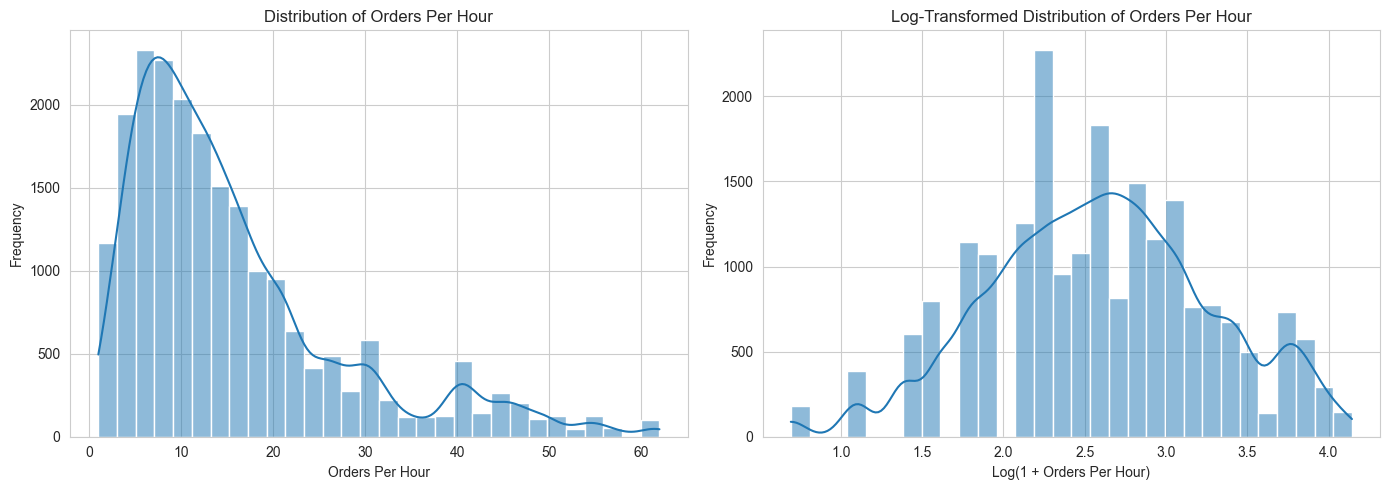

Analysis: The target variable 'orders_per_hour' is right-skewed. A log transformation helps normalize it, which can be beneficial for linear models or neural networks.




In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Setup for plotting ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Make sure the dataframe is sorted chronologically for time-series plots
merged_df = merged_df.sort_values(by=['order_date', 'order_hour']).reset_index(drop=True)

# -----------------------------------------------------------
# 1. Target Variable Analysis: orders_per_hour
# -----------------------------------------------------------
print("--- 1. Target Variable Analysis ---")
plt.figure(figsize=(14, 5))

# Plotting the original distribution
plt.subplot(1, 2, 1)
sns.histplot(merged_df['orders_per_hour'], kde=True, bins=30)
plt.title('Distribution of Orders Per Hour')
plt.xlabel('Orders Per Hour')
plt.ylabel('Frequency')

# Plotting the log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(merged_df['orders_per_hour']), kde=True, bins=30)
plt.title('Log-Transformed Distribution of Orders Per Hour')
plt.xlabel('Log(1 + Orders Per Hour)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Analysis: The target variable 'orders_per_hour' is right-skewed. A log transformation helps normalize it, which can be beneficial for linear models or neural networks.")
print("\n" + "="*80 + "\n")

--- 2. Temporal Analysis ---


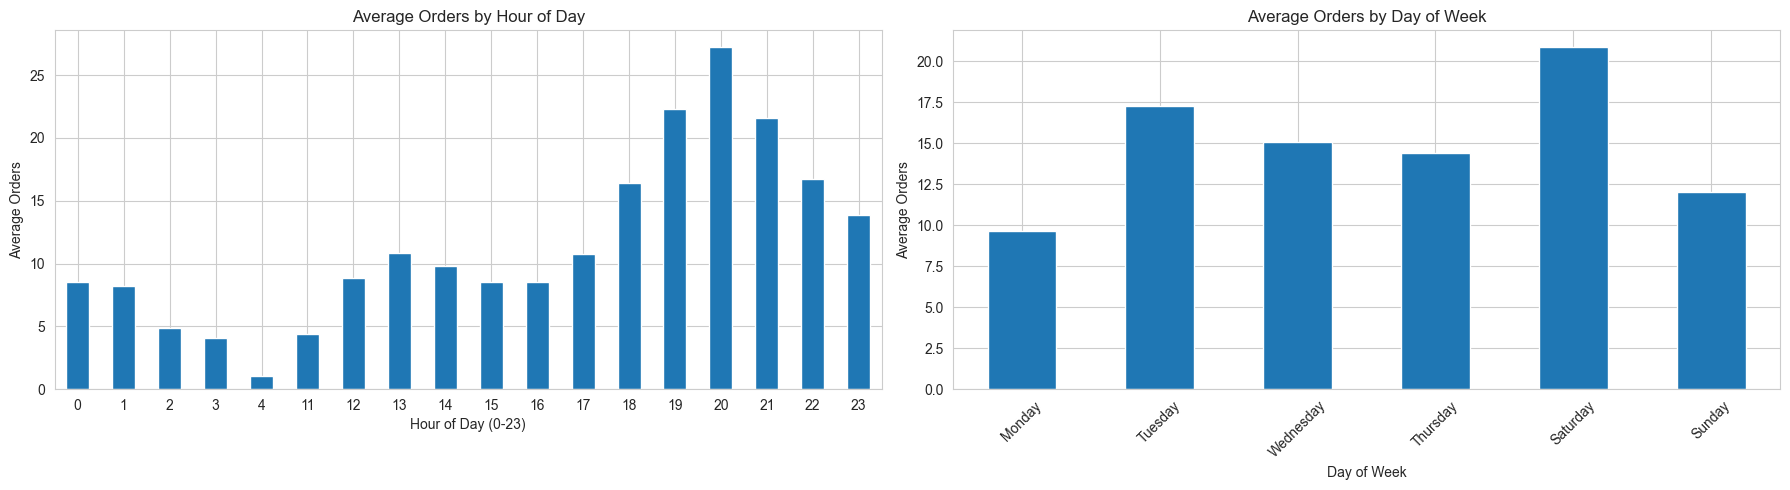

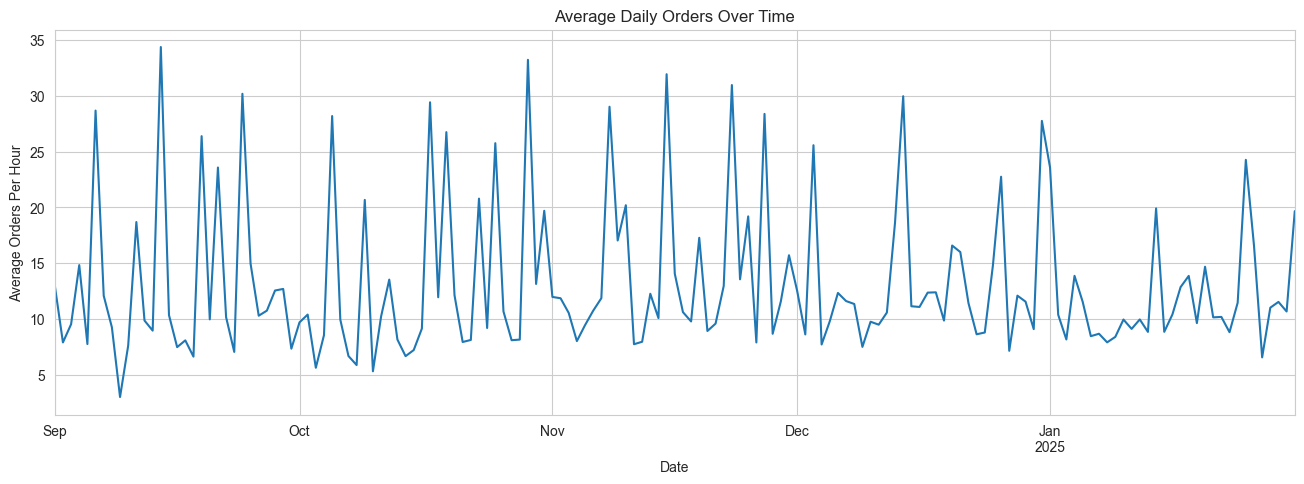

In [90]:
# -----------------------------------------------------------
# 2. Temporal Analysis
# -----------------------------------------------------------
print("--- 2. Temporal Analysis ---")
plt.figure(figsize=(18, 5))

# Average orders by hour of the day
plt.subplot(1, 2, 1)
merged_df.groupby('order_hour')['orders_per_hour'].mean().plot(kind='bar')
plt.title('Average Orders by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Orders')
plt.xticks(rotation=0)

# Average orders by day of the week
plt.subplot(1, 2, 2)
day_cols = ['day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 
            'day_of_week_Thursday', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday']
if 'day_of_week_Friday' not in merged_df.columns:
    day_cols.remove('day_of_week_Friday') 

day_means = {}
for day in day_cols:
    day_name = day.split('_')[-1]
    day_means[day_name] = merged_df[merged_df[day] == True]['orders_per_hour'].mean()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Filter to only days present in day_means
day_order_present = [d for d in day_order if d in day_means]

pd.Series(day_means).loc[day_order_present].plot(kind='bar')
plt.title('Average Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Overall trend over time
plt.figure(figsize=(16, 5))
merged_df.groupby('order_date')['orders_per_hour'].mean().plot()
plt.title('Average Daily Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Average Orders Per Hour')
plt.show()

--- 3. Feature Relationship Analysis ---


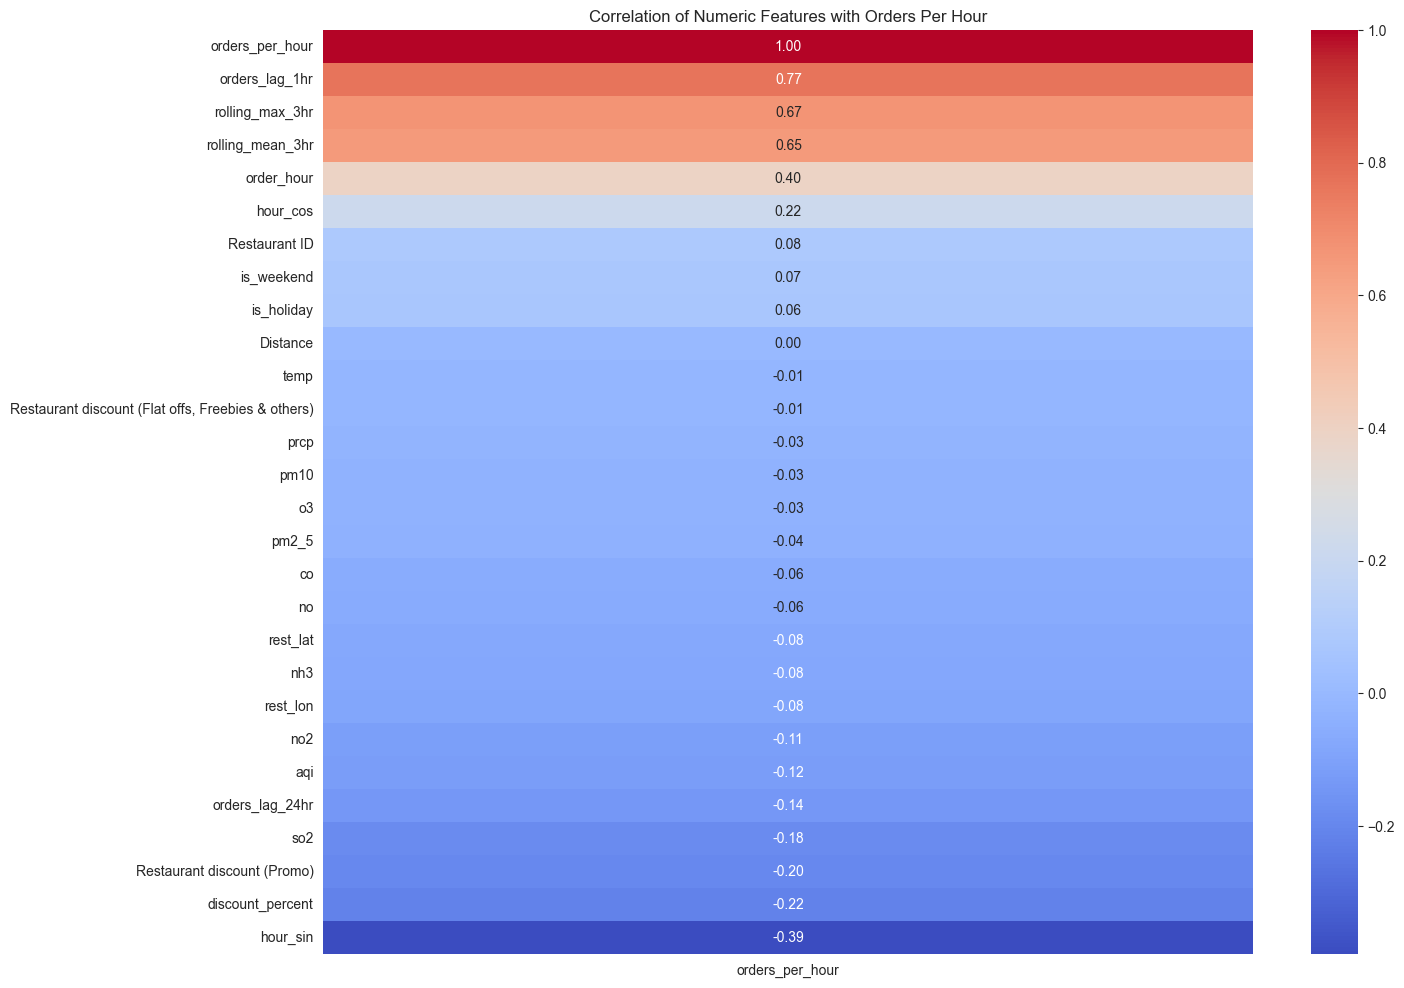

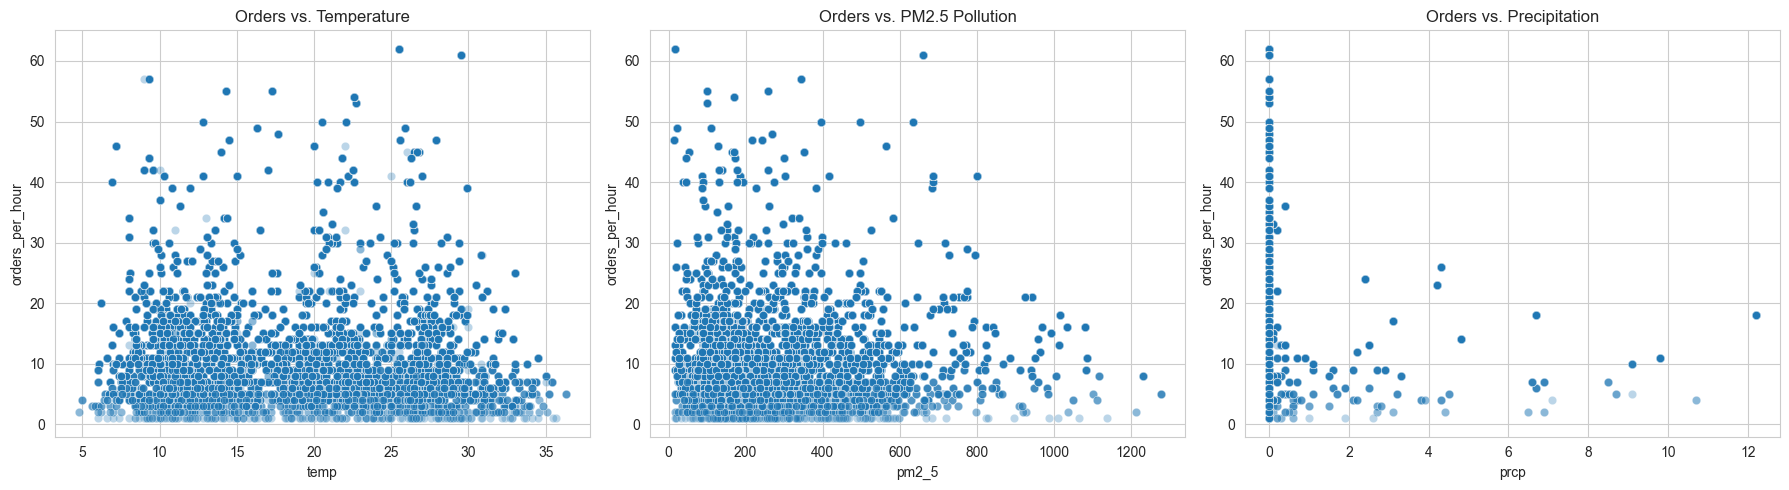

In [91]:
# -----------------------------------------------------------
# 3. Feature Relationship Analysis
# -----------------------------------------------------------
print("--- 3. Feature Relationship Analysis ---")

# Correlation Matrix
# Select only numeric types for correlation
numeric_df = merged_df.select_dtypes(include=np.number)
plt.figure(figsize=(15, 12))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix[['orders_per_hour']].sort_values(by='orders_per_hour', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numeric Features with Orders Per Hour')
plt.show()

# Bivariate Plots: Scatter plots against key features
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=merged_df, x='temp', y='orders_per_hour', alpha=0.3)
plt.title('Orders vs. Temperature')

plt.subplot(1, 3, 2)
sns.scatterplot(data=merged_df, x='pm2_5', y='orders_per_hour', alpha=0.3)
plt.title('Orders vs. PM2.5 Pollution')

plt.subplot(1, 3, 3)
sns.scatterplot(data=merged_df, x='prcp', y='orders_per_hour', alpha=0.3)
plt.title('Orders vs. Precipitation')
plt.tight_layout()
plt.show()

--- Distribution of Key External Features ---


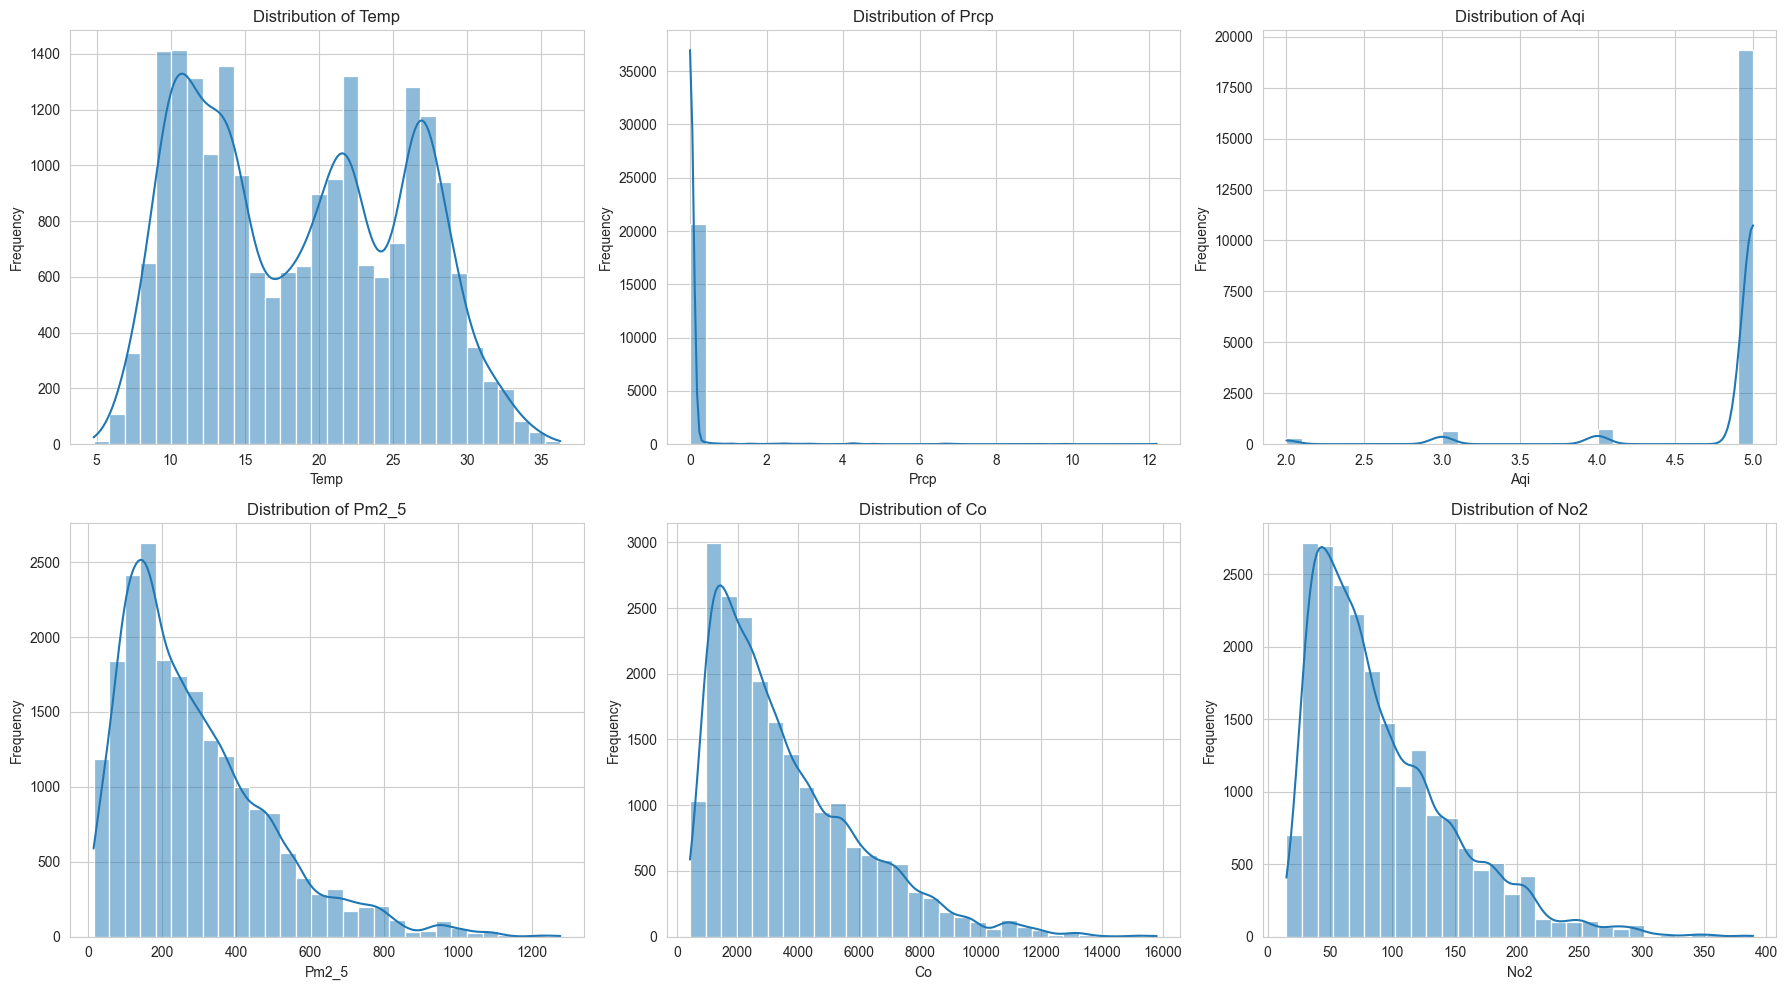

In [92]:
# --- 1.1. Distribution of External Features ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Distribution of Key External Features ---")

# List of new features to plot
external_features = ['temp', 'prcp', 'aqi', 'pm2_5', 'co', 'no2']

# Create plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() # Flatten the 2x3 grid to a 1D array for easy iteration

for i, feature in enumerate(external_features):
    sns.histplot(merged_df[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

--- Scatter Plots of External Features vs. Orders Per Hour ---


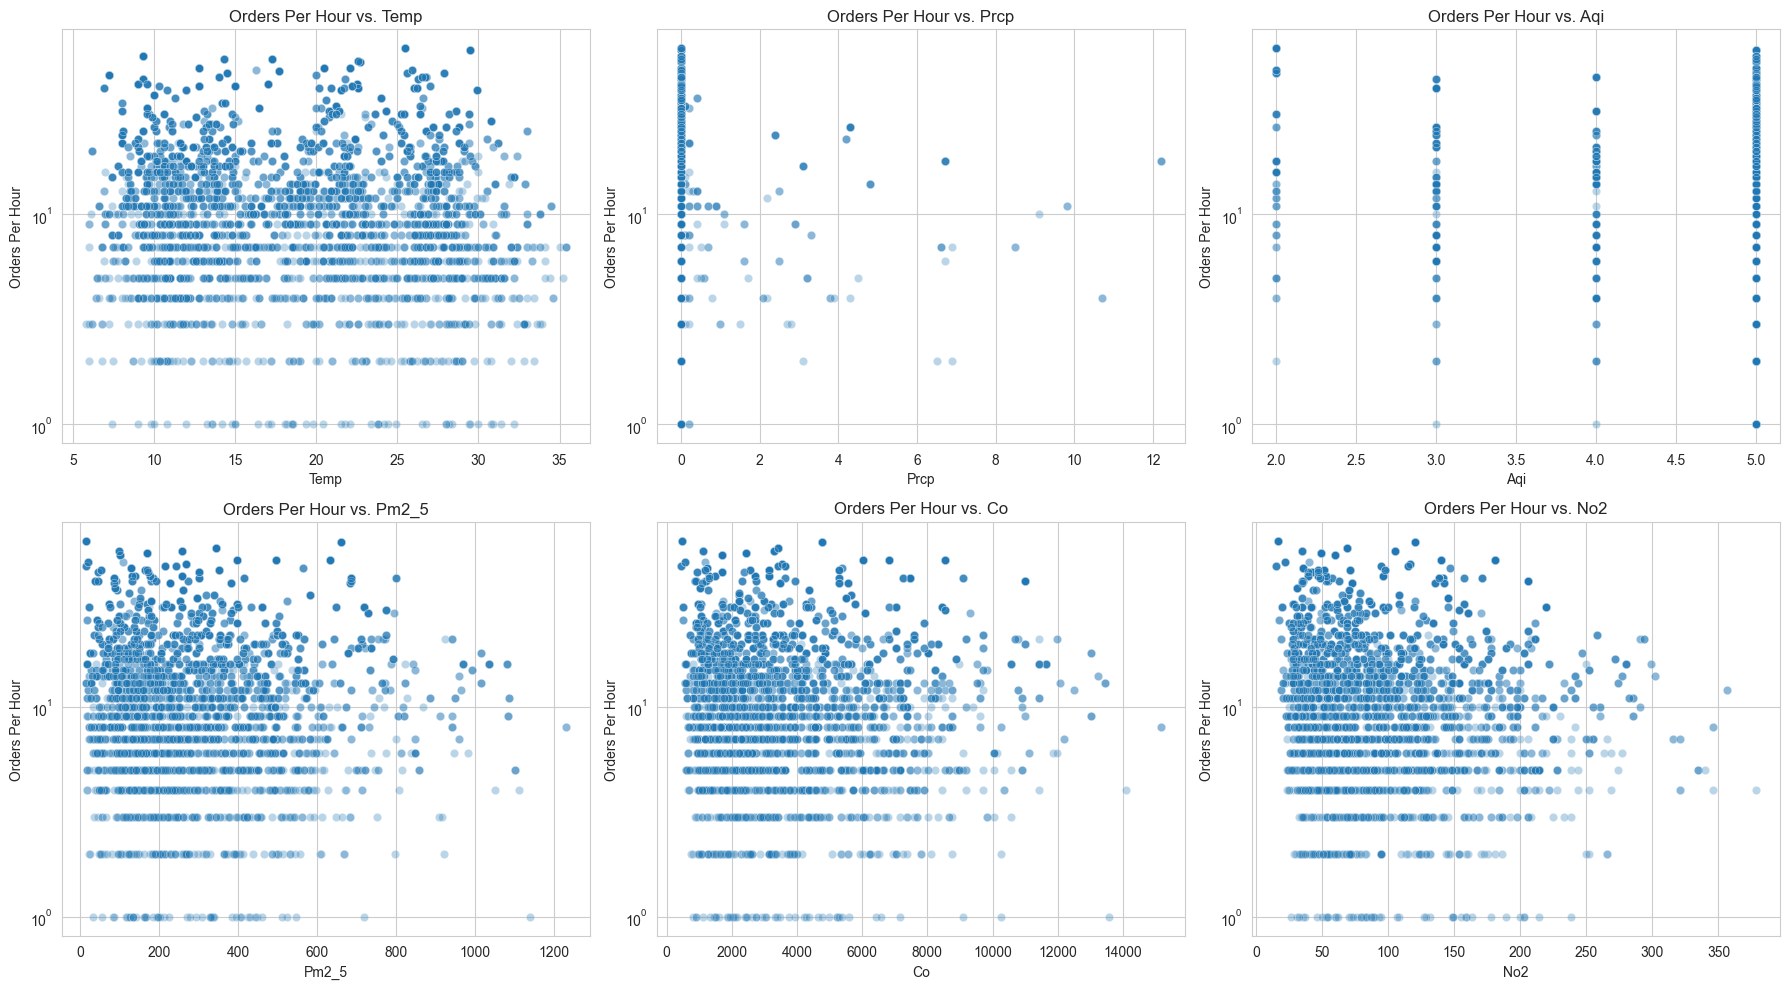

In [93]:
# --- 1.2. Relationship of External Features with Orders Per Hour ---

print("--- Scatter Plots of External Features vs. Orders Per Hour ---")

# Use a log scale for the y-axis to better visualize relationships, given the skew in orders_per_hour
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(external_features):
    # Using a sample to make plotting faster and clearer
    sample_df = merged_df.sample(n=min(5000, len(merged_df)), random_state=42)
    sns.scatterplot(data=sample_df, x=feature, y='orders_per_hour', alpha=0.3, ax=axes[i])
    axes[i].set_title(f'Orders Per Hour vs. {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Orders Per Hour')
    axes[i].set_yscale('log') # Log scale for better visibility

plt.tight_layout()
plt.show()

--- Time Series Comparison ---


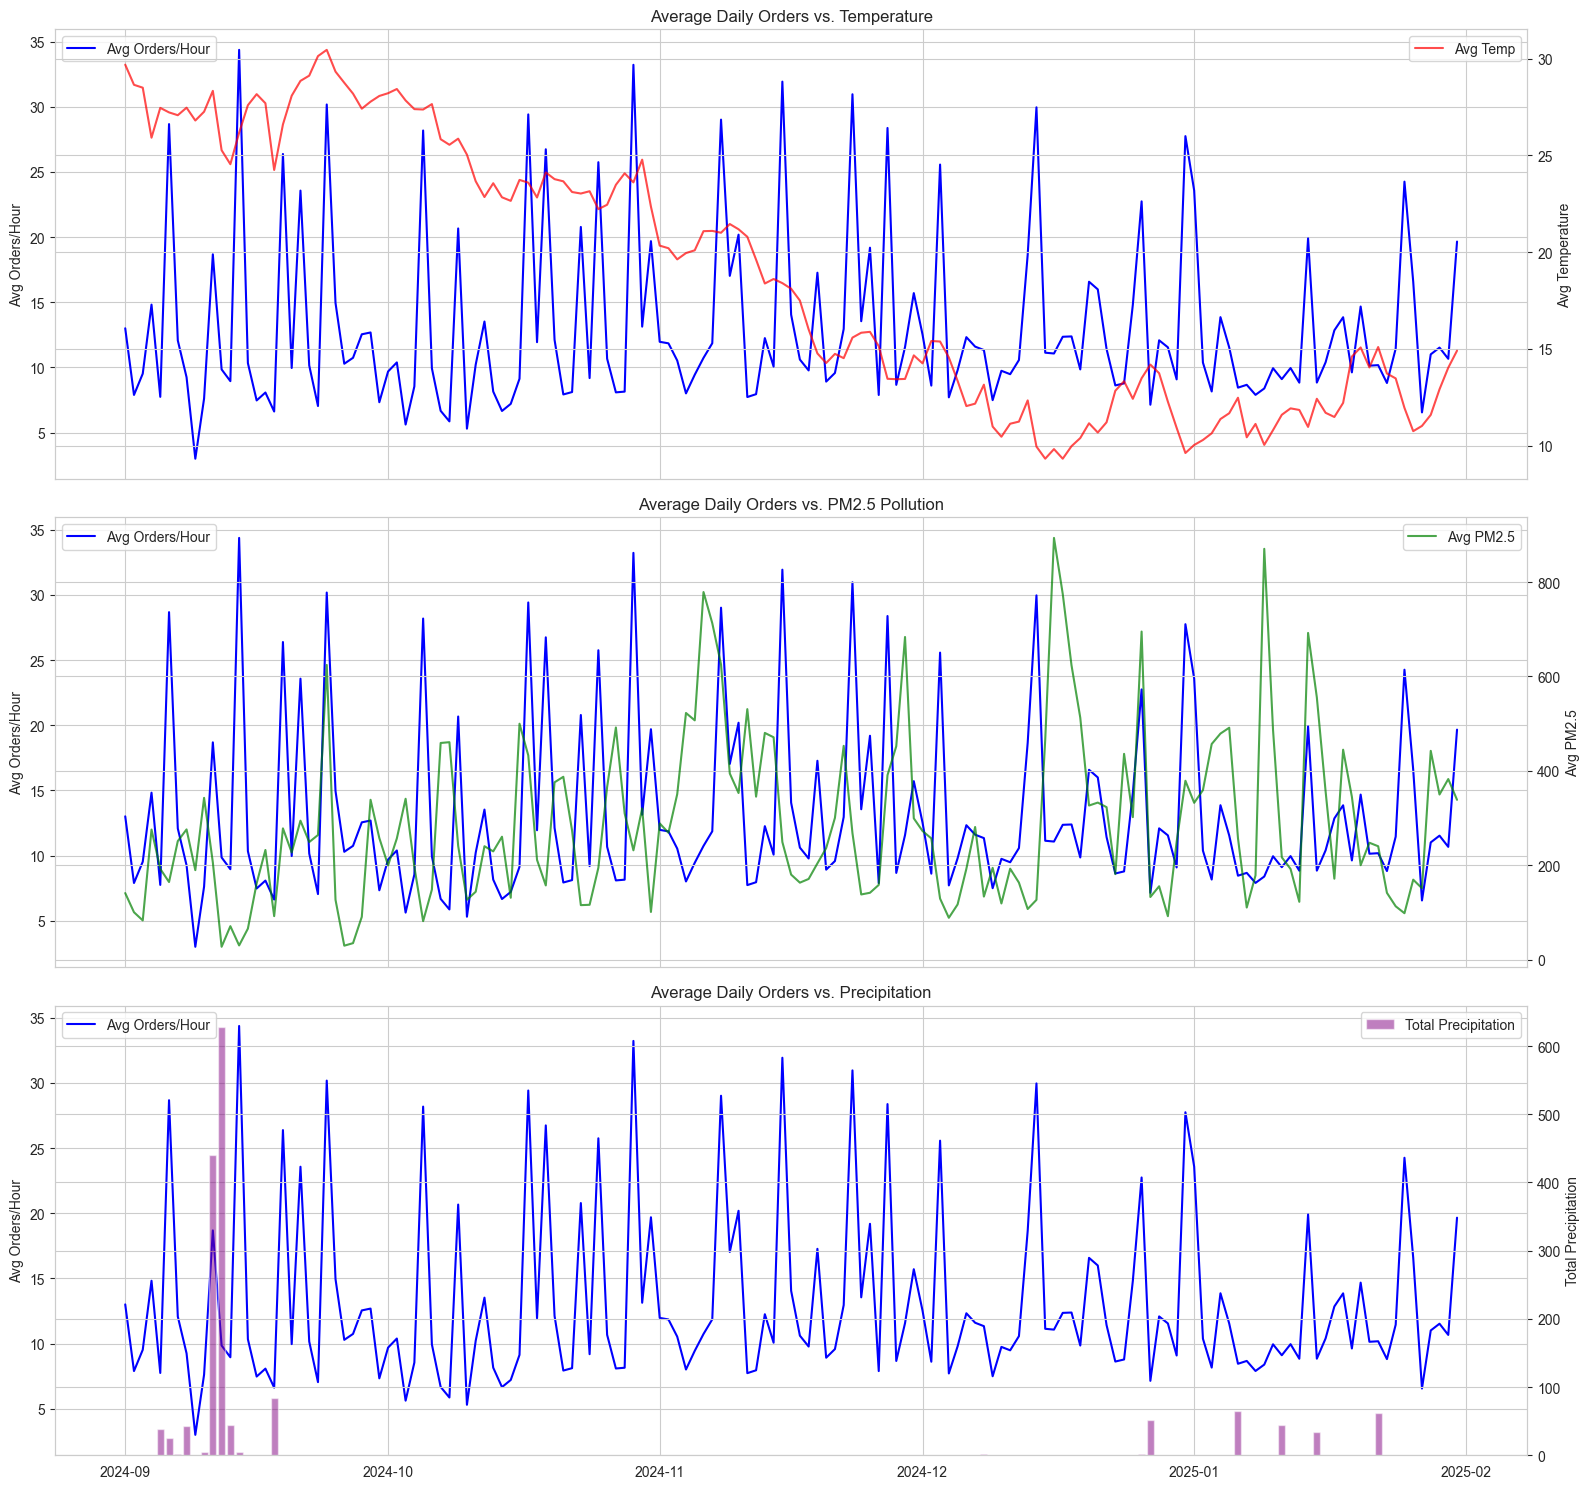

In [94]:
# --- 1.3. Time Series of External Factors vs. Order Demand ---

print("--- Time Series Comparison ---")

# Aggregate data by day to see broader trends
daily_agg = merged_df.groupby('order_date').agg({
    'orders_per_hour': 'mean',
    'temp': 'mean',
    'pm2_5': 'mean',
    'prcp': 'sum' # Sum of precipitation makes more sense on a daily level
}).reset_index()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 15), sharex=True)

# Plot Orders vs. Temperature
axes[0].plot(daily_agg['order_date'], daily_agg['orders_per_hour'], label='Avg Orders/Hour', color='blue')
ax0_twin = axes[0].twinx()
ax0_twin.plot(daily_agg['order_date'], daily_agg['temp'], label='Avg Temp', color='red', alpha=0.7)
axes[0].set_title('Average Daily Orders vs. Temperature')
axes[0].set_ylabel('Avg Orders/Hour')
ax0_twin.set_ylabel('Avg Temperature')
axes[0].legend(loc='upper left')
ax0_twin.legend(loc='upper right')

# Plot Orders vs. PM2.5
axes[1].plot(daily_agg['order_date'], daily_agg['orders_per_hour'], label='Avg Orders/Hour', color='blue')
ax1_twin = axes[1].twinx()
ax1_twin.plot(daily_agg['order_date'], daily_agg['pm2_5'], label='Avg PM2.5', color='green', alpha=0.7)
axes[1].set_title('Average Daily Orders vs. PM2.5 Pollution')
axes[1].set_ylabel('Avg Orders/Hour')
ax1_twin.set_ylabel('Avg PM2.5')
axes[1].legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Plot Orders vs. Precipitation
axes[2].plot(daily_agg['order_date'], daily_agg['orders_per_hour'], label='Avg Orders/Hour', color='blue')
ax2_twin = axes[2].twinx()
ax2_twin.bar(daily_agg['order_date'], daily_agg['prcp'], label='Total Precipitation', color='purple', alpha=0.5)
axes[2].set_title('Average Daily Orders vs. Precipitation')
axes[2].set_ylabel('Avg Orders/Hour')
ax2_twin.set_ylabel('Total Precipitation')
axes[2].legend(loc='upper left')
ax2_twin.legend(loc='upper right')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [95]:
print("--- Engineering Interaction Features ---")

# Rain on a weekend
merged_df['rainy_weekend'] = (merged_df['prcp'] > 0.1) & (merged_df['is_weekend'] == 1)
merged_df['rainy_weekend'] = merged_df['rainy_weekend'].astype(int)

# Bad weather condition (e.g., cold and rainy)
# Adjust thresholds as needed based on your data's climate
merged_df['cold_and_rainy'] = (merged_df['temp'] < 15) & (merged_df['prcp'] > 0.1)
merged_df['cold_and_rainy'] = merged_df['cold_and_rainy'].astype(int)

# High pollution during lunch hours (e.g., 12 PM to 3 PM)
merged_df['high_pollution_lunch'] = (merged_df['pm2_5'] > 100) & (merged_df['order_hour'].between(12, 15))
merged_df['high_pollution_lunch'] = merged_df['high_pollution_lunch'].astype(int)


print("Created new features: 'rainy_weekend', 'cold_and_rainy', 'high_pollution_lunch'")
print(merged_df[['rainy_weekend', 'cold_and_rainy', 'high_pollution_lunch']].head())

--- Engineering Interaction Features ---
Created new features: 'rainy_weekend', 'cold_and_rainy', 'high_pollution_lunch'
   rainy_weekend  cold_and_rainy  high_pollution_lunch
0              0               0                     0
1              0               0                     0
2              0               0                     0
3              0               0                     0
4              0               0                     0


In [96]:
merged_df.columns

Index(['Restaurant ID', 'Restaurant name', 'Distance',
       'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'order_date',
       'discount_percent', 'order_hour', 'Subzone_DLF Phase 1',
       'Subzone_Greater Kailash 2 (GK2)', 'Subzone_Sector 135',
       'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
       'Subzone_Vasant Kunj', 'is_weekend', 'is_holiday', 'hour_sin',
       'hour_cos', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'meal_slot_late_night', 'meal_slot_lunch',
       'orders_per_hour', 'orders_lag_1hr', 'orders_lag_24hr',
       'rolling_mean_3hr', 'rolling_max_3hr', 'aqi', 'co', 'no', 'no2', 'o3',
       'so2', 'pm2_5', 'pm10', 'nh3', 'rest_lat', 'rest_lon', 'temp', 'prcp',
       'rainy_weekend', 'cold_and_rainy', 'high_pollution_lunch'],
      dtype='object')

In [97]:
merged_df["rainy_weekend"].value_counts()

rainy_weekend
0    20929
1      117
Name: count, dtype: int64

In [98]:
merged_df["cold_and_rainy"].value_counts()

cold_and_rainy
0    20871
1      175
Name: count, dtype: int64

In [99]:
merged_df["high_pollution_lunch"].value_counts()

high_pollution_lunch
0    17605
1     3441
Name: count, dtype: int64

In [100]:
# --- 2.2. Creating Lagged External Features ---
print("--- Engineering Lagged External Features ---")

# We need to compute lags per restaurant to avoid data leakage
lagged_features = {}
for restaurant_id, group in merged_df.groupby('Restaurant ID'):
    group = group.sort_values(by=['order_date', 'order_hour'])
    
    # Create lags for key weather and pollution features
    for feature in ['temp', 'prcp', 'pm2_5']:
        for lag in [1, 2, 3]:
            col_name = f'{feature}_lag_{lag}hr'
            group[col_name] = group[feature].shift(lag)
    
    lagged_features[restaurant_id] = group

# Concatenate the processed groups back into a single DataFrame
merged_df_lagged = pd.concat(lagged_features.values())

# Fill initial NaN values that result from shifting
merged_df_lagged.fillna(0, inplace=True)

# Update your main dataframe
merged_df = merged_df_lagged

print(merged_df[['temp', 'temp_lag_1hr', 'temp_lag_2hr', 'prcp', 'prcp_lag_1hr']].head())

--- Engineering Lagged External Features ---
    temp  temp_lag_1hr  temp_lag_2hr  prcp  prcp_lag_1hr
3   28.6           0.0           0.0   0.0           0.0
4   28.6          28.6           0.0   0.0           0.0
5   28.6          28.6          28.6   0.0           0.0
10  30.2          28.6          28.6   0.0           0.0
23  31.9          30.2          28.6   0.0           0.0


In [101]:
# --- 2.3. Creating Non-Linear and Categorical Features ---
print("--- Engineering Non-Linear and Categorical Features ---")

# Temperature squared to capture U-shaped relationship (both very hot/cold might increase orders)
merged_df['temp_squared'] = merged_df['temp']**2

# Bin temperature into categories
temp_bins = [-np.inf, 10, 20, 30, np.inf]
temp_labels = ['very_cold', 'cold', 'mild', 'hot']
merged_df['temp_category'] = pd.cut(merged_df['temp'], bins=temp_bins, labels=temp_labels)

# Bin AQI (Air Quality Index) into standard categories
aqi_bins = [-np.inf, 1, 2, 3, 4, np.inf] # Assuming AQI is on a 1-5 scale as seen in your data
aqi_labels = ['good', 'fair', 'moderate', 'poor', 'very_poor']
merged_df['aqi_category'] = pd.cut(merged_df['aqi'], bins=aqi_bins, labels=aqi_labels)

# Convert the new categorical features into dummy variables for modeling
merged_df = pd.get_dummies(merged_df, columns=['temp_category', 'aqi_category'], drop_first=True)

print("Created 'temp_squared' and binned categories for temperature and AQI.")
print(merged_df[['temp', 'temp_squared', 'temp_category_cold', 'aqi_category_fair']].head())

--- Engineering Non-Linear and Categorical Features ---
Created 'temp_squared' and binned categories for temperature and AQI.
    temp  temp_squared  temp_category_cold  aqi_category_fair
3   28.6        817.96               False              False
4   28.6        817.96               False              False
5   28.6        817.96               False              False
10  30.2        912.04               False              False
23  31.9       1017.61               False              False


In [102]:
merged_df.columns

Index(['Restaurant ID', 'Restaurant name', 'Distance',
       'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'order_date',
       'discount_percent', 'order_hour', 'Subzone_DLF Phase 1',
       'Subzone_Greater Kailash 2 (GK2)', 'Subzone_Sector 135',
       'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
       'Subzone_Vasant Kunj', 'is_weekend', 'is_holiday', 'hour_sin',
       'hour_cos', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'meal_slot_late_night', 'meal_slot_lunch',
       'orders_per_hour', 'orders_lag_1hr', 'orders_lag_24hr',
       'rolling_mean_3hr', 'rolling_max_3hr', 'aqi', 'co', 'no', 'no2', 'o3',
       'so2', 'pm2_5', 'pm10', 'nh3', 'rest_lat', 'rest_lon', 'temp', 'prcp',
       'rainy_weekend', 'cold_and_rainy', 'high_pollution_lunch',
       'temp_lag_1hr', 'temp_lag_2hr', 'temp_lag_3hr', 'prcp_la

In [103]:
import numpy as np

# --- 1.1. Define Feature Sets and Target Transformation ---

# Log transform the target variable
merged_df['orders_per_hour_log'] = np.log1p(merged_df['orders_per_hour'])

# Define the baseline features (temporal + core features from your original cleaned_df)
# Ensure these match the columns from your baseline model's training data
baseline_features = [
    'Distance', 'Restaurant discount (Promo)', 'Restaurant discount (Flat offs, Freebies & others)',
    'discount_percent', 'order_hour', 'Subzone_DLF Phase 1', 'Subzone_Greater Kailash 2 (GK2)',
    'Subzone_Sector 135', 'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
    'Subzone_Vasant Kunj', 'is_weekend', 'is_holiday', 'hour_sin', 'hour_cos',
    'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
    'day_of_week_Tuesday', 'day_of_week_Wednesday', 'meal_slot_late_night', 'meal_slot_lunch',
    'orders_lag_1hr', 'orders_lag_24hr', 'rolling_mean_3hr', 'rolling_max_3hr'
]

# Define the full feature set (all baseline features + new external and engineered ones)
# We exclude original target and date columns
full_features = [col for col in merged_df.columns if col not in [
    'Restaurant ID', 'Restaurant name', 'order_date', 'orders_per_hour', 'orders_per_hour_log'
]]

# Define the target variable
TARGET = 'orders_per_hour_log'

print(f"Baseline feature count: {len(baseline_features)}")
print(f"Full feature count: {len(full_features)}")

Baseline feature count: 28
Full feature count: 61


In [104]:
# --- 1.2. Time-Based Train-Validation-Test Split ---

# Ensure data is sorted chronologically before splitting
merged_df = merged_df.sort_values(by=['order_date', 'order_hour']).reset_index(drop=True)

# Define split points
train_size = int(len(merged_df) * 0.70)
val_size = int(len(merged_df) * 0.15)
test_size = len(merged_df) - train_size - val_size

train_df = merged_df.iloc[:train_size]
val_df = merged_df.iloc[train_size:train_size + val_size]
test_df = merged_df.iloc[train_size + val_size:]

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Create feature and target sets for each split
# Baseline Features
X_train_base = train_df[baseline_features]
y_train = train_df[TARGET]
X_val_base = val_df[baseline_features]
y_val = val_df[TARGET]
X_test_base = test_df[baseline_features]
y_test = test_df[TARGET]

# Full Features
X_train_full = train_df[full_features]
X_val_full = val_df[full_features]
X_test_full = test_df[full_features]

Training set size: 14732
Validation set size: 3156
Test set size: 3158


In [105]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- 2. Model Training and Evaluation Pipeline ---

def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    # Handle XGBoost separately (supports early stopping)
    if isinstance(model, XGBRegressor):
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )
    else:
        # For RandomForest or other models
        model.fit(X_train, y_train)

    # Predictions and metrics
    y_pred_log = model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_val_orig = np.expm1(y_val)

    r2 = r2_score(y_val_orig, y_pred)
    mae = mean_absolute_error(y_val_orig, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred))

    return {'model': model, 'R-squared': r2, 'MAE': mae, 'RMSE': rmse}

# Initialize models
xgb_model = XGBRegressor(n_estimators=1000, early_stopping_rounds=50, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# --- Run Comparative Analysis ---
results = []

print("Training XGBoost on Baseline Features...")
xgb_base_results = train_and_evaluate(
    XGBRegressor(
        n_estimators=1000,
        early_stopping_rounds=50,
        eval_metric='rmse',
        random_state=42
    ),
    X_train_base, y_train, X_val_base, y_val
)
results.append({'Model': 'XGBoost', 'Features': 'Baseline', **xgb_base_results})

print("Training XGBoost on Full Features...")
xgb_full_results = train_and_evaluate(
    XGBRegressor(n_estimators=1000, early_stopping_rounds=50, random_state=42),
    X_train_full, y_train, X_val_full, y_val
)
results.append({'Model': 'XGBoost', 'Features': 'Full (External+Engineered)', **xgb_full_results})

print("Training Random Forest on Baseline Features...")
rf_base_results = train_and_evaluate(
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    X_train_base, y_train, X_val_base, y_val
)
results.append({'Model': 'Random Forest', 'Features': 'Baseline', **rf_base_results})

print("Training Random Forest on Full Features...")
rf_full_results = train_and_evaluate(
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    X_train_full, y_train, X_val_full, y_val
)
results.append({'Model': 'Random Forest', 'Features': 'Full (External+Engineered)', **rf_full_results})

# --- Display Results ---
results_df = pd.DataFrame(results)
print("\n--- Comparative Model Performance on Validation Set ---")
display(results_df[['Model', 'Features', 'R-squared', 'MAE', 'RMSE']])

Training XGBoost on Baseline Features...
Training XGBoost on Full Features...
Training Random Forest on Baseline Features...
Training Random Forest on Full Features...

--- Comparative Model Performance on Validation Set ---


,Model,Features,R-squared,MAE,RMSE
0,XGBoost,Baseline,0.716825,4.085063,5.496049
1,XGBoost,Full (External+Engineered),0.641392,4.423129,6.184908
2,Random Forest,Baseline,0.601414,5.040034,6.520550
3,Random Forest,Full (External+Engineered),0.529636,5.167932,7.083376


In [ ]:
# --- 3. Ablation Study ---

# Define feature groups for the study
external_raw_features = [
    'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3',
    'rest_lat', 'rest_lon', 'temp', 'prcp'
]

# The remaining features in 'full_features' that are not in 'baseline_features' or 'external_raw_features' are the engineered ones.
engineered_features_added = list(set(full_features) - set(baseline_features) - set(external_raw_features))

# Define feature sets for ablation
features_baseline_plus_external = baseline_features + external_raw_features
features_full = baseline_features + external_raw_features + engineered_features_added

ablation_results = []

# Model 1: Baseline only
# We already have this result from the previous step
baseline_score = results_df[(results_df['Model'] == 'XGBoost') & (results_df['Features'] == 'Baseline')]['R-squared'].iloc[0]
ablation_results.append({'Feature Set': '1. Baseline Only', 'R-squared': baseline_score})

# Model 2: Baseline + Raw External Features
print("\nAblation Study: Training XGBoost with Baseline + Raw External Features...")
X_train_ext = train_df[features_baseline_plus_external]
X_val_ext = val_df[features_baseline_plus_external]

xgb_ext_results = train_and_evaluate(
    XGBRegressor(n_estimators=1000, early_stopping_rounds=50, random_state=42),
    X_train_ext, y_train, X_val_ext, y_val
)
ablation_results.append({'Feature Set': '2. Baseline + External', 'R-squared': xgb_ext_results['R-squared']})

# Model 3: Full Feature Set
# We also have this result already
full_score = results_df[(results_df['Model'] == 'XGBoost') & (results_df['Features'].str.contains('Full'))]['R-squared'].iloc[0]
ablation_results.append({'Feature Set': '3. Baseline + External + Engineered', 'R-squared': full_score})


# --- Display Ablation Results ---
ablation_df = pd.DataFrame(ablation_results).set_index('Feature Set')
print("\n--- Ablation Study Results (XGBoost on Validation Set) ---")
display(ablation_df)

# Plot the results
ablation_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Impact of Feature Groups on R-squared (Ablation Study)')
plt.ylabel('R-squared')
plt.xticks(rotation=0)
plt.ylim(bottom=max(0, ablation_df['R-squared'].min() - 0.05)) # Adjust y-axis to better see differences
plt.show()

In [ ]:
# --- 4. Error Analysis on the Best Model ---

print("--- Performing Error Analysis on XGBoost (Full Features) ---")

# Get the best model from our results
best_model = xgb_full_results['model']

# Get predictions and residuals on the validation set
y_val_pred_log = best_model.predict(X_val_full)
y_val_pred = np.expm1(y_val_pred_log)
y_val_orig = np.expm1(y_val)
residuals = y_val_orig - y_val_pred

# Create a temporary DataFrame for plotting
error_analysis_df = val_df.copy()
error_analysis_df['predicted'] = y_val_pred
error_analysis_df['residual'] = residuals

# Plot 1: Residuals vs. Predicted Values
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='predicted', y='residual', data=error_analysis_df, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Orders per Hour')
plt.ylabel('Residual (Actual - Predicted)')

# Plot 2: Residuals Over Time
plt.subplot(1, 2, 2)
error_analysis_df.groupby('order_date')['residual'].mean().plot(kind='line')
plt.axhline(0, color='red', linestyle='--')
plt.title('Average Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Average Residual')
plt.show()


# Plot 3: Residuals vs. a Key External Feature (e.g., Temperature)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='residual', data=error_analysis_df, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Residual')
plt.show()

In [ ]:
# --- 6. Final Model Training and Test Set Evaluation ---

print("\n--- Final Evaluation on Unseen Test Set ---")

# Combine training and validation data
X_train_val_full = pd.concat([X_train_full, X_val_full])
y_train_val = pd.concat([y_train, y_val])

# Create a new instance of the model and train it on the combined data
final_model = XGBRegressor(n_estimators=1000, early_stopping_rounds=50, random_state=42)

final_model.fit(X_train_val_full, y_train_val,
                eval_set=[(X_test_full, y_test)], # Use test set for early stopping in the final run
                verbose=False)

# Evaluate on the test set
final_results = train_and_evaluate(final_model, X_train_val_full, y_train_val, X_test_full, y_test)


print("\n--- Final Model Performance on Test Set ---")
print(f"R-squared: {final_results['R-squared']:.4f}")
print(f"MAE: {final_results['MAE']:.4f}")
print(f"RMSE: {final_results['RMSE']:.4f}")


In [ ]:
# --- Additional Analysis: Standard Feature Importance Plots ---

print("\n--- Generating Standard Feature Importance Plots ---")

# Get the trained models from your results DataFrame
best_xgb_model = results_df.loc[(results_df['Model'] == 'XGBoost') & (results_df['Features'].str.contains('Full'))]['model'].iloc[0]
best_rf_model = results_df.loc[(results_df['Model'] == 'Random Forest') & (results_df['Features'].str.contains('Full'))]['model'].iloc[0]

# --- XGBoost Feature Importance ---
xgb_importance = pd.DataFrame({
    'feature': X_train_full.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False).head(25) # Display top 25

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=xgb_importance)
plt.title('Top 25 Feature Importances from XGBoost (Full Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# --- Random Forest Feature Importance ---
rf_importance = pd.DataFrame({
    'feature': X_train_full.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(25) # Display top 25

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=rf_importance)
plt.title('Top 25 Feature Importances from Random Forest (Full Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()